In [221]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_colwidth', -1)
%matplotlib inline

### Import the dataset

In [178]:
dir = "/Users/Collier/Dropbox/Skills/Analysis-Research/CityBars_withYelp/"
bar_data = pd.read_csv(dir + "yelp_data_bars.csv", encoding = "ISO-8859-1")

In [179]:
bar_data = bar_data[~bar_data['Address'].isnull()]
# del bar_data['index']

### Parse City Name from Address

In [180]:
def city_finder(search_string):
    if "Austin," in search_string:
        return "Austin"
    elif "Houston," in search_string:
        return "Houston"
    elif "San Francisco," in search_string:
        return "San Francisco"
    elif "Los Angeles," in search_string:
        return "Los Angeles"
    elif "Seattle," in search_string:
        return "Seattle"
    elif "Portland," in search_string:
        return "Portland"
    elif "Washington," in search_string:
        return "Washington, DC"
    elif "Chicago," in search_string:
        return "Chicago"
    elif "Denver," in search_string:
        return "Denver"
    elif "Boston," in search_string:
        return "Boston"
    elif "New York," in search_string:
        return "New York"

In [181]:
bar_data["Address"] = bar_data["Address"].astype(str)
bar_data['City'] = bar_data['Address'].apply(city_finder)
bar_data["City"].unique()

array(['Austin', 'Houston', 'San Francisco', 'Los Angeles', None,
       'Seattle', 'Portland', 'Washington, DC', 'Chicago', 'Denver',
       'Boston', 'New York'], dtype=object)

### Ratings & Reviews

In [16]:
bar_reviews = bar_data.groupby('City').agg({'Reviews':np.mean}).sort_values('Reviews',ascending=False).reset_index()
bar_ratings = bar_data.groupby('City').agg({'Rating':np.mean}).sort_values('Rating',ascending=False).reset_index()

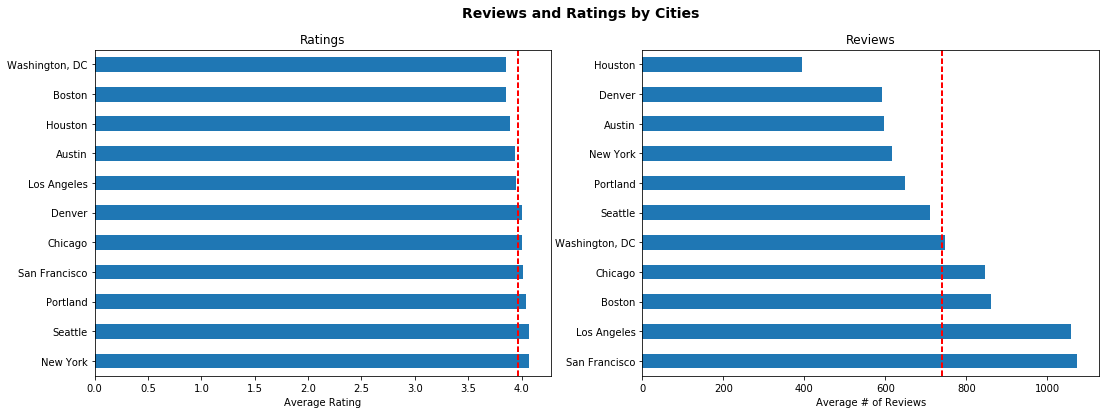

In [50]:
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(18, 6))
bar_ratings.plot(kind='barh', y="Rating", x="City", ax=ax0)
ax0.set(title='Ratings', xlabel='Average Rating', ylabel='')

# Plot the average as a vertical line
avg = bar_ratings['Rating'].mean()
ax0.axvline(x=avg, color='r', label='Average', linestyle='--', linewidth=2)

# Repeat for the unit plot
bar_reviews.plot(kind='barh', y="Reviews", x="City", ax=ax1)
avg = bar_reviews['Reviews'].mean()
ax1.set(title='Reviews', xlabel='Average # of Reviews', ylabel='')
ax1.axvline(x=avg, color='r', label='Average', linestyle='--', linewidth=2)

# Title the figure
fig.suptitle('Reviews and Ratings by Cities', fontsize=14, fontweight='bold');

# Hide the legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

### Alcohol

In [62]:
bar_data['Alcohol'] = bar_data['Alcohol'].astype(str)
bar_data['Alcohol'].unique()

array(['Full Bar', 'Beer & Wine Only', 'nan'], dtype=object)

In [61]:
bar_data_grp = pd.DataFrame(bar_data.groupby(['City','Alcohol']).size()).reset_index()

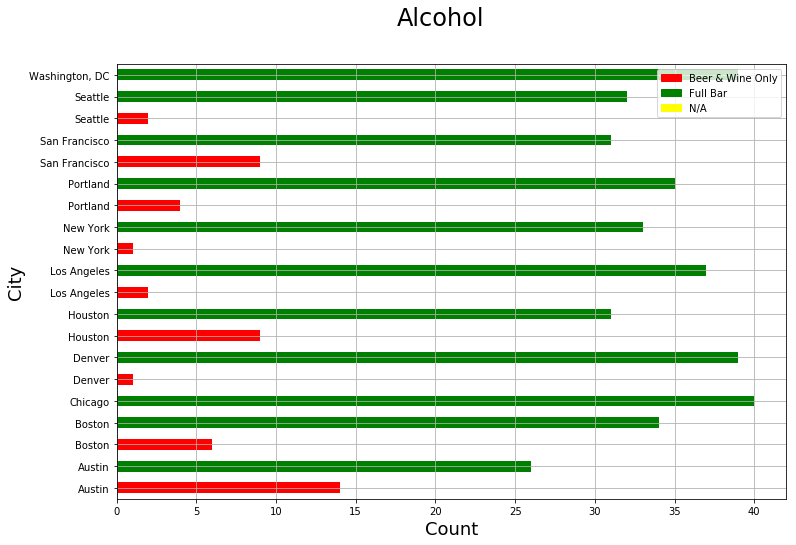

In [63]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = {"Full Bar": 'g', "Beer & Wine Only":"r","nan":"y"}
bar_data_grp.plot(kind='barh', y=0, x="City", ax=ax, color=[colors[i] for i in bar_data_grp['Alcohol']])

red_patch = mpatches.Patch(color='red', label='Beer & Wine Only')
green_patch = mpatches.Patch(color='green', label='Full Bar')
yellow_patch = mpatches.Patch(color='yellow', label='N/A')

plt.grid()
plt.legend(handles=[red_patch,green_patch,yellow_patch],loc=1)

fig.suptitle('Alcohol', fontsize=24)
plt.xlabel('Count', fontsize=18)
plt.ylabel('City', fontsize=18)

In [13]:
bar_data['Alcohol_FullBar'] = bar_data['Alcohol'].apply(lambda x: 1 if x == "Full Bar" else 0)
bar_data['Alcohol_BeerWine'] = bar_data['Alcohol'].apply(lambda x: 1 if x == "Beer & Wine Only" else 0)

### Ambience

List the unique types of ambience in the dataset

In [14]:
bar_data['Ambience'] = bar_data['Ambience'].astype(str)
bar_data['Ambience'].unique()

array(['Casual', 'Classy', 'Romantic', 'Trendy', 'Divey', 'Hipster',
       'Hipster, Casual', 'nan', 'Divey, Casual', 'Casual, Trendy',
       'Divey, Hipster, Casual', 'Intimate', 'Classy, Upscale',
       'Hipster, Casual, Trendy', 'Divey, Hipster', 'Hipster, Trendy',
       'Intimate, Romantic', 'Intimate, Classy',
       'Romantic, Classy, Upscale', 'Upscale', 'Trendy, Classy',
       'Trendy, Upscale'], dtype=object)

Plot the ambience types by frequency.

In [58]:
# bar_data.groupby(['Ambience']).size().sort_values().plot(kind="bar")
bar_data_grp = pd.DataFrame(bar_data.groupby(['City','Ambience']).size()).reset_index()

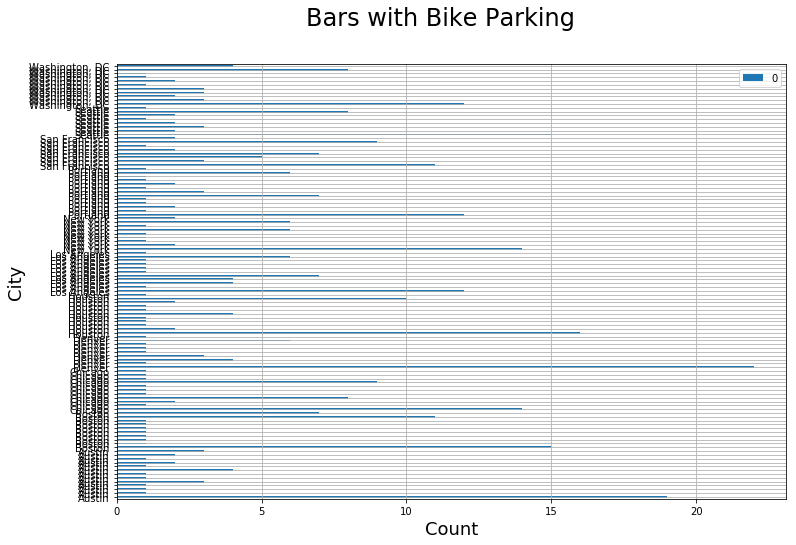

In [60]:
fig, ax = plt.subplots(figsize=(12, 8))
# colors = {"Yes": 'g', "No":"r","nan":"y"}
bar_data_grp.plot(kind='barh', y=0, x="City", ax=ax)
                  
#                   color=[colors[i] for i in bar_data_grp['Ambience']])

# red_patch = mpatches.Patch(color='red', label='No')
# green_patch = mpatches.Patch(color='green', label='Yes')
# yellow_patch = mpatches.Patch(color='yellow', label='N/A')

plt.grid()
# plt.legend(handles=[red_patch,green_patch],loc=1)

fig.suptitle('Bars with Bike Parking', fontsize=24)
plt.xlabel('Count', fontsize=18)
plt.ylabel('City', fontsize=18)

Create one-hot coding for ambience features.

In [16]:
bar_data['Ambience_Casual'] = bar_data['Ambience'].apply(lambda x: 1 if "Casual" in x else 0)
bar_data['Ambience_Classy'] = bar_data['Ambience'].apply(lambda x: 1 if "Classy" in x else 0)
bar_data['Ambience_Romantic'] = bar_data['Ambience'].apply(lambda x: 1 if "Romantic" in x else 0)
bar_data['Ambience_Trendy'] = bar_data['Ambience'].apply(lambda x: 1 if "Trendy" in x else 0)
bar_data['Ambience_Divey'] = bar_data['Ambience'].apply(lambda x: 1 if "Divey" in x else 0)
bar_data['Ambience_Hipster'] = bar_data['Ambience'].apply(lambda x: 1 if "Hipster" in x else 0)
bar_data['Ambience_Intimate'] = bar_data['Ambience'].apply(lambda x: 1 if "Intimate" in x else 0)
bar_data['Ambience_Upscale'] = bar_data['Ambience'].apply(lambda x: 1 if "Upscale" in x else 0)

### Best Nights

List the unique combinations of 'best nights' in the dataset

In [17]:
bar_data['Best Nights'] = bar_data['Best Nights'].astype(str)
bar_data['Best Nights'].unique()

array(['nan', 'Thu, Fri, Sat', 'Fri, Sat, Sun', 'Thu', 'Wed, Thu, Fri',
       'Mon, Wed, Sat', 'Wed, Fri, Sat', 'Tue, Wed, Fri', 'Mon, Wed, Sun',
       'Thu, Fri, Sun', 'Mon, Tue, Sun', 'Wed', 'Tue, Fri, Sat', 'Fri',
       'Thu, Sat, Sun', 'Mon, Fri, Sat', 'Sat, Sun', 'Tue, Thu, Sat',
       'Wed, Thu, Sat', 'Mon, Thu, Sat', 'Tue, Wed, Sat', 'Tue, Wed, Thu',
       'Wed, Thu, Sun', 'Mon, Fri, Sun', 'Tue, Fri, Sun', 'Mon, Tue, Fri',
       'Wed, Sat, Sun', 'Mon, Tue, Wed', 'Sat', 'Tue, Sat, Sun',
       'Mon, Wed, Thu', 'Mon, Tue, Sat', 'Mon, Thu, Fri', 'Fri, Sat',
       'Tue, Thu, Fri'], dtype=object)

In [52]:
# bar_data.groupby(['Best Nights']).size().sort_values().plot(kind="bar")
bar_data_grp = pd.DataFrame(bar_data.groupby(['City','Best Nights']).size()).reset_index()

Create 'one-hot' coding for these variables.

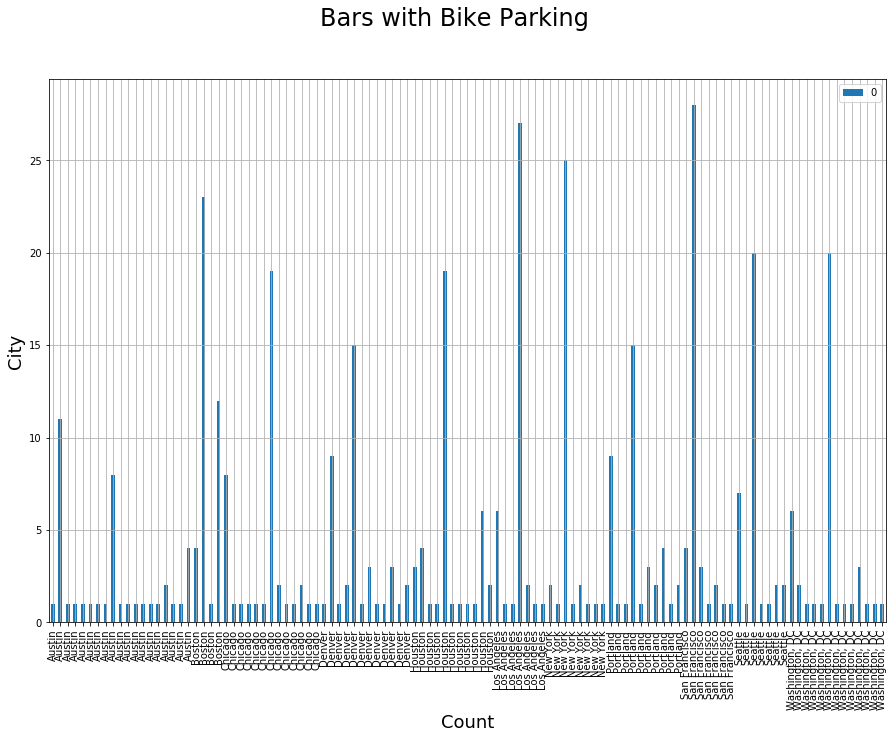

In [57]:
fig, ax = plt.subplots(figsize=(15, 10))
# colors = {"Yes": 'g', "No":"r","nan":"y"}
bar_data_grp.plot(kind='bar', y=0, x="Best Nights",ax=ax)
                  
#                   , ax=ax,color=[colors[i] for i in bar_data_grp['Bike Parking']])

# red_patch = mpatches.Patch(color='red', label='No')
# green_patch = mpatches.Patch(color='green', label='Yes')
# yellow_patch = mpatches.Patch(color='yellow', label='N/A')

plt.grid()
# plt.legend(handles=[red_patch,green_patch],loc=1)

fig.suptitle('Best Nights', fontsize=24)
plt.xlabel('Count', fontsize=18)
plt.ylabel('City', fontsize=18)

In [19]:
bar_data['BestNight_Monday'] = bar_data['Best Nights'].apply(lambda x: 1 if "Mon" in x else 0)
bar_data['BestNight_Tuesday'] = bar_data['Best Nights'].apply(lambda x: 1 if "Tue" in x else 0)
bar_data['BestNight_Wednesday'] = bar_data['Best Nights'].apply(lambda x: 1 if "Wed" in x else 0)
bar_data['BestNight_Thursday'] = bar_data['Best Nights'].apply(lambda x: 1 if "Thu" in x else 0)
bar_data['BestNight_Friday'] = bar_data['Best Nights'].apply(lambda x: 1 if "Fri" in x else 0)
bar_data['BestNight_Saturday'] = bar_data['Best Nights'].apply(lambda x: 1 if "Sat" in x else 0)
bar_data['BestNight_Sunday'] = bar_data['Best Nights'].apply(lambda x: 1 if "Sun" in x else 0)

### Bike Parking

List the unique types of bike parking.

In [127]:
bar_data['Bike Parking'] = bar_data['Bike Parking'].astype(str)
bar_data['Bike Parking'].unique()

array(['Yes', 'No'], dtype=object)

In [128]:
bar_data_grp = pd.DataFrame(bar_data.groupby(['City','Bike Parking']).size()).reset_index()

Create 'one-hot' coding.

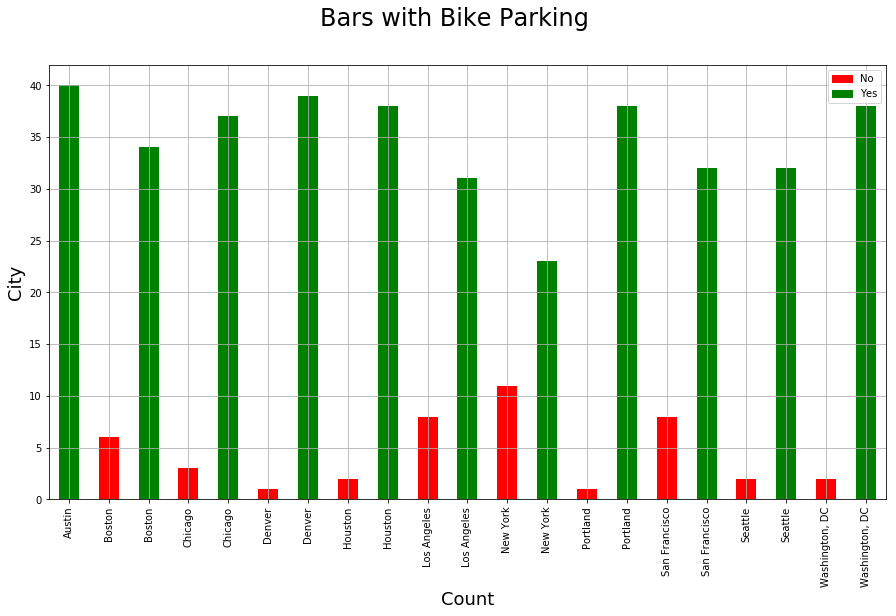

In [129]:
fig, ax = plt.subplots(figsize=(15, 8))
colors = {"Yes": 'g', "No":"r","nan":"y"}
bar_data_grp.plot(kind='bar', y=0, x="City", ax=ax,color=[colors[i] for i in bar_data_grp['Bike Parking']])

red_patch = mpatches.Patch(color='red', label='No')
green_patch = mpatches.Patch(color='green', label='Yes')
# yellow_patch = mpatches.Patch(color='yellow', label='N/A')

plt.grid()
plt.legend(handles=[red_patch,green_patch],loc=1)

fig.suptitle('Bars with Bike Parking', fontsize=24)
plt.xlabel('Count', fontsize=18)
plt.ylabel('City', fontsize=18)

In [22]:
bar_data['BikeParking_Yes'] = bar_data['Bike Parking'].apply(lambda x: 1 if x == "Yes" else 0)

### Good For Dancing

In [23]:
bar_data['Good For Dancing'] = bar_data['Good For Dancing'].astype(str)
bar_data['Good For Dancing'].unique()

array(['nan', 'No', 'Yes'], dtype=object)

In [40]:
bar_data_grp = pd.DataFrame(bar_data.groupby(['City','Good For Dancing']).size()).reset_index()

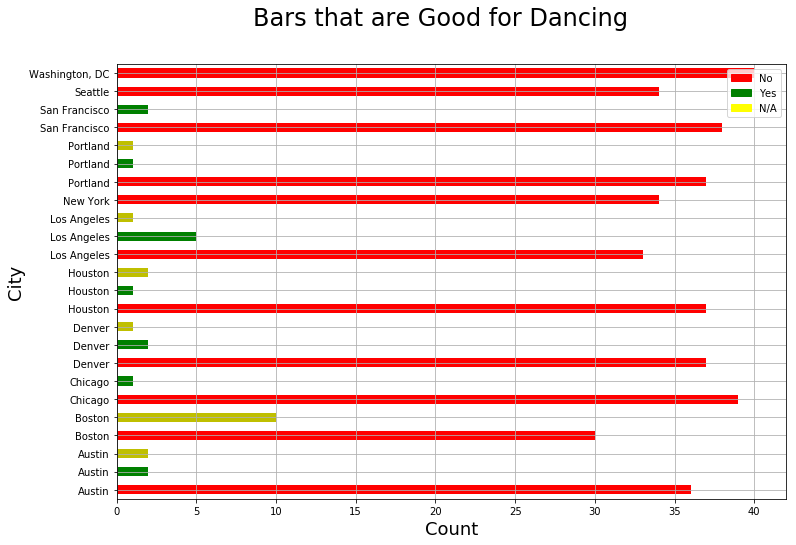

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = {"Yes": 'g', "No":"r","nan":"y"}
bar_data_grp.plot(kind='barh', y=0, x="City", ax=ax,color=[colors[i] for i in bar_data_grp['Good For Dancing']])

red_patch = mpatches.Patch(color='red', label='No')
green_patch = mpatches.Patch(color='green', label='Yes')
yellow_patch = mpatches.Patch(color='yellow', label='N/A')

plt.grid()
plt.legend(handles=[red_patch,green_patch,yellow_patch],loc=1)

fig.suptitle('Bars that are Good for Dancing', fontsize=24)
plt.xlabel('Count', fontsize=18)
plt.ylabel('City', fontsize=18)

In [25]:
bar_data['GoodDancing_Yes'] = bar_data['Good For Dancing'].apply(lambda x: 1 if x == "Yes" else 0)

### Good for Groups

In [32]:
bar_data['Good for Groups'] = bar_data['Good for Groups'].astype(str)
bar_data['Good for Groups'].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
# bar_data.groupby(['City','Good for Groups']).size().plot(kind="barh")
bar_data_grp = pd.DataFrame(bar_data.groupby(['City','Good for Groups']).size()).reset_index()

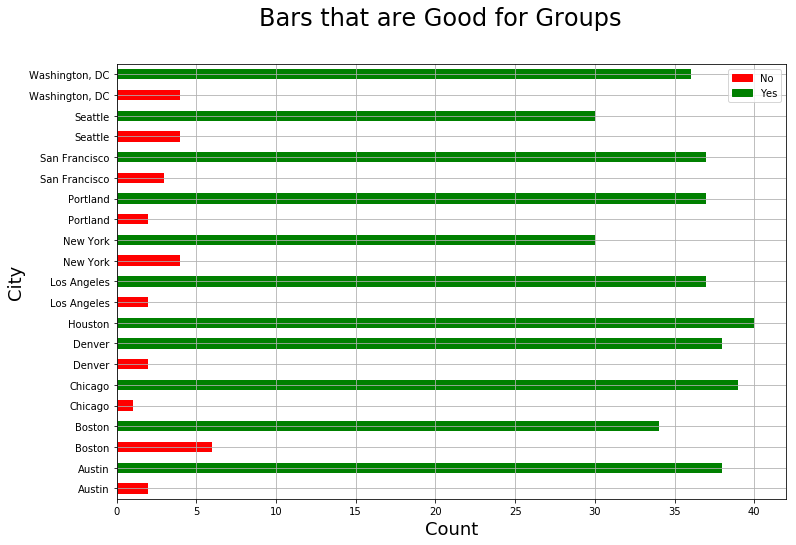

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = {"Yes": 'g', "No":"r","nan":"y"}
bar_data_grp.plot(kind='barh', y=0, x="City", ax=ax,color=[colors[i] for i in bar_data_grp['Good for Groups']])

red_patch = mpatches.Patch(color='red', label='No')
green_patch = mpatches.Patch(color='green', label='Yes')
# yellow_patch = mpatches.Patch(color='yellow', label='N/A')

plt.grid()
plt.legend(handles=[red_patch,green_patch],loc=1)

fig.suptitle('Bars that are Good for Groups', fontsize=24)
plt.xlabel('Count', fontsize=18)
plt.ylabel('City', fontsize=18)

In [28]:
bar_data['GoodGroups_Yes'] = bar_data['Good for Groups'].apply(lambda x: 1 if x == "Yes" else 0)

### Happy Hour

In [117]:
bar_data["Happy Hour"] = bar_data["Happy Hour"].astype(str)
bar_data["Happy Hour"].unique()

array(['nan', 'Yes', 'No'], dtype=object)

In [118]:
bar_data_grp = pd.DataFrame(bar_data.groupby(['City','Happy Hour']).size()).reset_index()

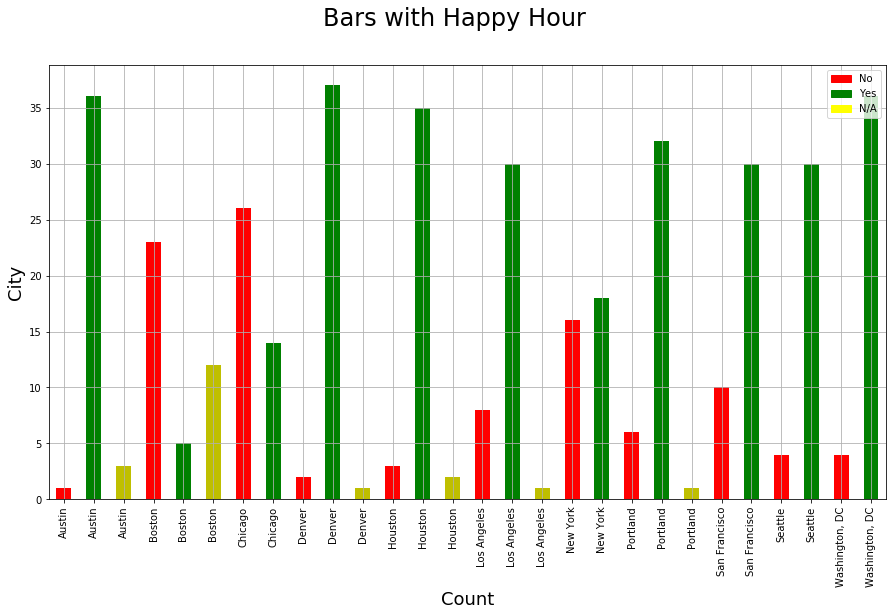

In [120]:
fig, ax = plt.subplots(figsize=(15, 8))
colors = {"Yes": 'g', "No":"r","nan":"y"}
bar_data_grp.plot(kind='bar', y=0, x="City", ax=ax,color=[colors[i] for i in bar_data_grp['Happy Hour']])

red_patch = mpatches.Patch(color='red', label='No')
green_patch = mpatches.Patch(color='green', label='Yes')
yellow_patch = mpatches.Patch(color='yellow', label='N/A')

plt.grid()
plt.legend(handles=[red_patch,green_patch,yellow_patch],loc=1)

fig.suptitle('Bars with Happy Hour', fontsize=24)
plt.xlabel('Count', fontsize=18)
plt.ylabel('City', fontsize=18)

In [73]:
bar_data['HappyHour_Yes'] = bar_data['Happy Hour'].apply(lambda x: 1 if x == "Yes" else 0)

### Has Pool Table

In [124]:
bar_data["Has Pool Table"] = bar_data["Has Pool Table"].astype(str)
bar_data["Has Pool Table"].unique()

array(['nan', 'No', 'Yes'], dtype=object)

In [125]:
bar_data_grp = pd.DataFrame(bar_data.groupby(['City','Has Pool Table']).size()).reset_index()

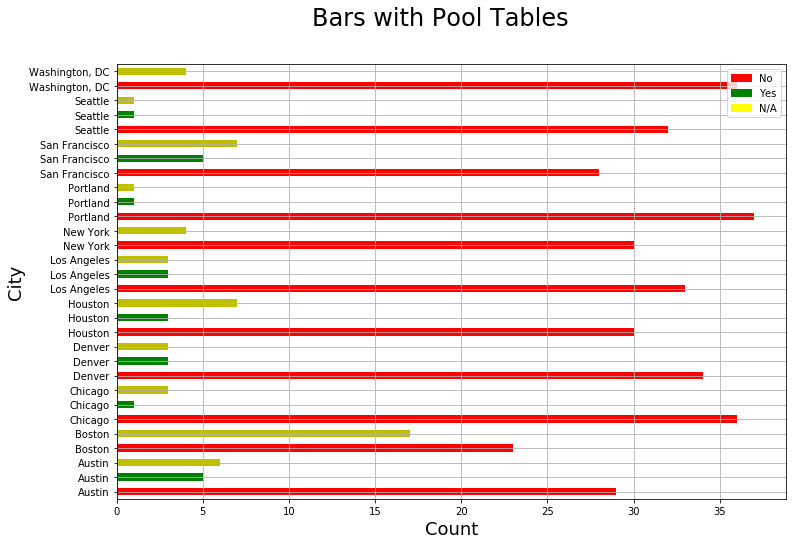

In [126]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = {"Yes": 'g', "No":"r","nan":"y"}
bar_data_grp.plot(kind='barh', y=0, x="City", ax=ax,color=[colors[i] for i in bar_data_grp['Has Pool Table']])

red_patch = mpatches.Patch(color='red', label='No')
green_patch = mpatches.Patch(color='green', label='Yes')
yellow_patch = mpatches.Patch(color='yellow', label='N/A')

plt.grid()
plt.legend(handles=[red_patch,green_patch,yellow_patch],loc=1)

fig.suptitle('Bars with Pool Tables', fontsize=24)
plt.xlabel('Count', fontsize=18)
plt.ylabel('City', fontsize=18)

In [75]:
bar_data['PoolTable_Yes'] = bar_data['Has Pool Table'].apply(lambda x: 1 if x == "Yes" else 0)

### Has TV

In [107]:
bar_data["Has TV"] = bar_data["Has TV"].astype(str)
bar_data["Has TV"].unique()

array(['Yes', 'No'], dtype=object)

In [108]:
bar_data_grp = pd.DataFrame(bar_data.groupby(['City','Has TV']).size()).reset_index()

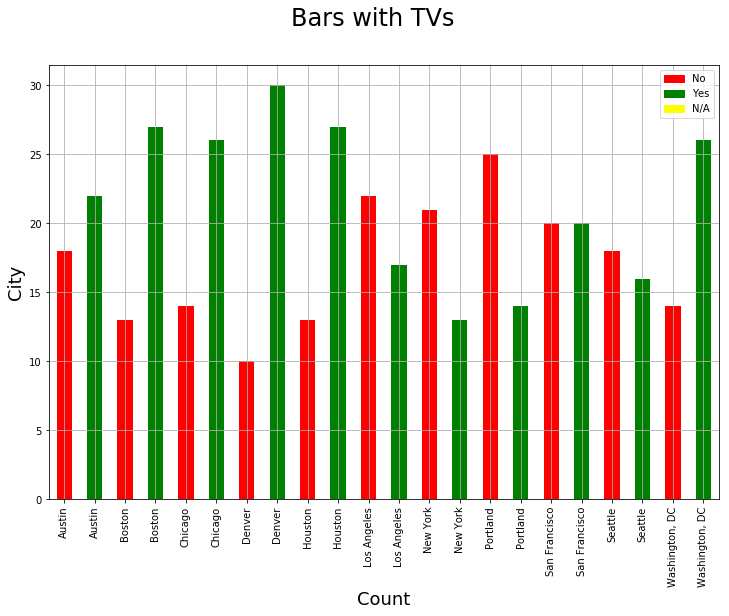

In [110]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = {"Yes": 'g', "No":"r","nan":"y"}
bar_data_grp.plot(kind='bar', y=0, x="City", ax=ax,color=[colors[i] for i in bar_data_grp['Has TV']])

red_patch = mpatches.Patch(color='red', label='No')
green_patch = mpatches.Patch(color='green', label='Yes')
yellow_patch = mpatches.Patch(color='yellow', label='N/A')

plt.grid()
plt.legend(handles=[red_patch,green_patch,yellow_patch],loc=1)

fig.suptitle('Bars with TVs', fontsize=24)
plt.xlabel('Count', fontsize=18)
plt.ylabel('City', fontsize=18)

In [77]:
bar_data['HasTV_Yes'] = bar_data['Has TV'].apply(lambda x: 1 if x == "Yes" else 0)

### Music

In [68]:
bar_data["Music"] = bar_data["Music"].astype(str)
bar_data["Music"].unique()

array(['nan', 'Background', 'Live', 'Juke Box', 'DJ', 'Music Videos',
       'DJ, Live', 'Karaoke', 'DJ, Juke Box'], dtype=object)

In [69]:
bar_data_grp = pd.DataFrame(bar_data.groupby(['City','Music']).size()).reset_index()

In [70]:
bar_data_grp = bar_data_grp[bar_data_grp['Music']!='nan']
bar_data_grp = bar_data_grp[bar_data_grp['Music']!='DJ, Juke Box']
bar_data_grp = bar_data_grp[bar_data_grp['Music']!='DJ, Live']

In [71]:
bar_data_grp['Music'].unique()

array(['Background', 'Juke Box', 'Live', 'DJ', 'Music Videos', 'Karaoke'], dtype=object)

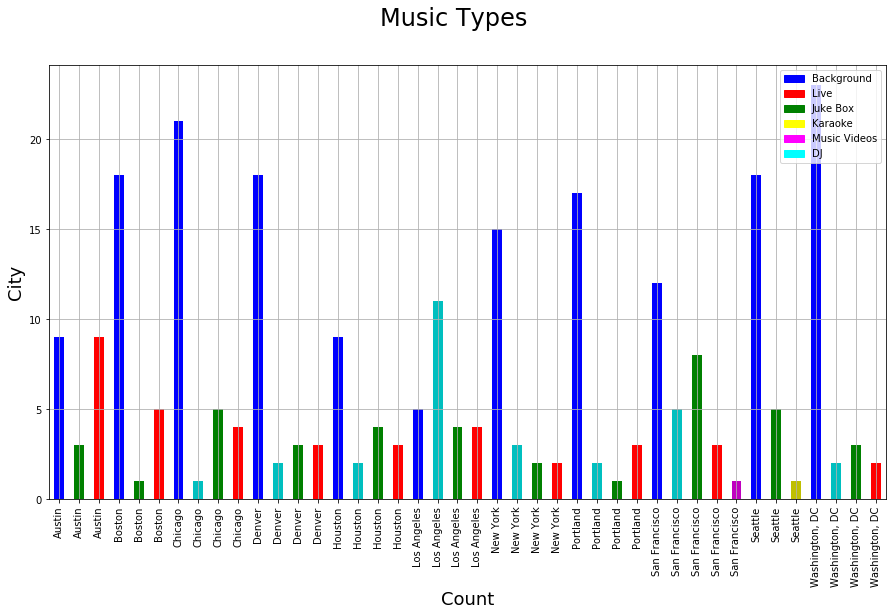

In [73]:
fig, ax = plt.subplots(figsize=(15, 8))

colors = {"Background":'b',"Juke Box":"g","Live":"r","DJ":"c","Music Videos":"m","Karaoke":"y"}

bar_data_grp.plot(kind='bar', y=0, x="City", ax=ax,color=[colors[i] for i in bar_data_grp['Music']])

blue_patch = mpatches.Patch(color='blue', label='Background')
green_patch = mpatches.Patch(color='green', label='Juke Box')
red_patch = mpatches.Patch(color='red', label='Live')
cyan_patch = mpatches.Patch(color='cyan', label='DJ')
magenta_patch = mpatches.Patch(color='magenta', label='Music Videos')
yellow_patch = mpatches.Patch(color='yellow', label='Karaoke')

plt.grid()
plt.legend(handles=[blue_patch,red_patch,green_patch,yellow_patch,magenta_patch,cyan_patch],loc=1)

fig.suptitle('Music Types', fontsize=24)
plt.xlabel('Count', fontsize=18)
plt.ylabel('City', fontsize=18)

In [79]:
bar_data['Music_Background'] = bar_data['Music'].apply(lambda x: 1 if "Background" in x else 0)
bar_data['Music_Live'] = bar_data['Music'].apply(lambda x: 1 if "Live" in x else 0)
bar_data['Music_JukeBox'] = bar_data['Music'].apply(lambda x: 1 if "Juke Box" in x else 0)
bar_data['Music_DJ'] = bar_data['Music'].apply(lambda x: 1 if "DJ" in x else 0)
bar_data['Music_Videos'] = bar_data['Music'].apply(lambda x: 1 if "Music Videos" in x else 0)
bar_data['Music_Karaoke'] = bar_data['Music'].apply(lambda x: 1 if "Karaoke" in x else 0)

### Noise Level

In [74]:
bar_data["Noise Level"] = bar_data["Noise Level"].astype(str)
bar_data["Noise Level"].unique()

array(['Average', 'Loud', 'Very Loud', 'Quiet'], dtype=object)

In [75]:
bar_data_grp = pd.DataFrame(bar_data.groupby(['City','Noise Level']).size()).reset_index()

In [76]:
bar_data_grp['Noise Level'].unique()

array(['Average', 'Loud', 'Very Loud', 'Quiet'], dtype=object)

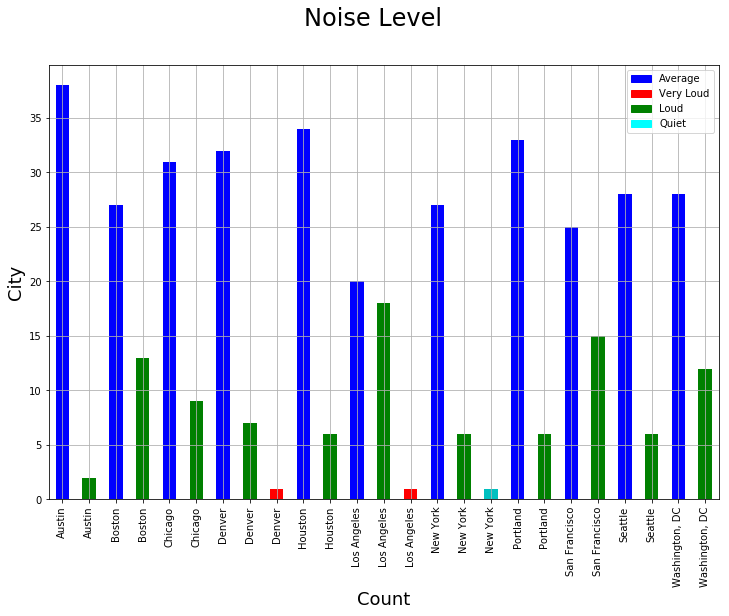

In [77]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = {"Average":'b',"Loud":"g","Very Loud":"r","Quiet":"c"}

bar_data_grp.plot(kind='bar', y=0, x="City", ax=ax,color=[colors[i] for i in bar_data_grp['Noise Level']])

blue_patch = mpatches.Patch(color='blue', label='Average')
green_patch = mpatches.Patch(color='green', label='Loud')
red_patch = mpatches.Patch(color='red', label='Very Loud')
cyan_patch = mpatches.Patch(color='cyan', label='Quiet')

plt.grid()
plt.legend(handles=[blue_patch,red_patch,green_patch,cyan_patch],loc=1)

fig.suptitle('Noise Level', fontsize=24)
plt.xlabel('Count', fontsize=18)
plt.ylabel('City', fontsize=18)

In [81]:
bar_data['Noise_Average'] = bar_data['Music'].apply(lambda x: 1 if "Average" in x else 0)
bar_data['Music_Loud'] = bar_data['Music'].apply(lambda x: 1 if "Loud" in x else 0)
bar_data['Music_VeryLoud'] = bar_data['Music'].apply(lambda x: 1 if "Very Loud" in x else 0)
bar_data['Music_Quiet'] = bar_data['Music'].apply(lambda x: 1 if "Quiet" in x else 0)

### Outdoor Seating

In [78]:
bar_data["Outdoor Seating"] = bar_data["Outdoor Seating"].astype(str)
bar_data["Outdoor Seating"].unique()

array(['Yes', 'No', 'nan'], dtype=object)

In [79]:
bar_data_grp = pd.DataFrame(bar_data.groupby(['City','Outdoor Seating']).size()).reset_index()

In [81]:
bar_data_grp['Outdoor Seating'].unique()

array(['No', 'Yes'], dtype=object)

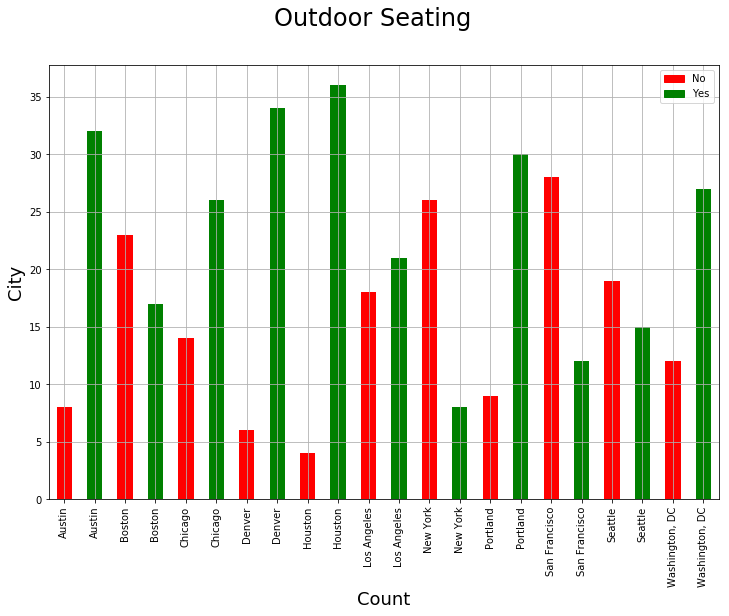

In [82]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = {"No":'r',"Yes":"g"}

bar_data_grp.plot(kind='bar', y=0, x="City", ax=ax,color=[colors[i] for i in bar_data_grp['Outdoor Seating']])

green_patch = mpatches.Patch(color='green', label='Yes')
red_patch = mpatches.Patch(color='red', label='No')

plt.grid()
plt.legend(handles=[red_patch,green_patch],loc=1)

fig.suptitle('Outdoor Seating', fontsize=24)
plt.xlabel('Count', fontsize=18)
plt.ylabel('City', fontsize=18)

In [83]:
bar_data['OutdoorSeating_Yes'] = bar_data['Outdoor Seating'].apply(lambda x: 1 if "Yes" in x else 0)

### Parking

In [301]:
bar_data["Parking"] = bar_data["Parking"].astype(str)
bar_data["Parking"].unique()

array(['Valet, Street', 'Street', 'Street, Private Lot, Validated',
       'Street, Private Lot', 'Private Lot', 'Valet, Private Lot',
       'Garage, Street', 'Garage, Street, Private Lot', 'Garage',
       'Valet, Street, Private Lot', 'Valet', 'nan',
       'Valet, Garage, Street', 'Garage, Street, Validated',
       'Valet, Garage, Street, Private Lot, Validated',
       'Valet, Street, Private Lot, Validated', 'Street, Validated',
       'Valet, Garage, Street, Private Lot', 'Valet, Street, Validated',
       'Valet, Garage, Street, Validated'], dtype=object)

In [302]:
bar_data_grp = pd.DataFrame(bar_data.groupby(['City','Parking']).size()).reset_index()

In [303]:
bar_data_grp['Parking_Street'] = bar_data_grp['Parking'].apply(lambda x: 1 if 'Street' in x else 0)
bar_data_grp['Parking_Valet'] = bar_data_grp['Parking'].apply(lambda x: 1 if 'Valet' in x else 0)
bar_data_grp['Parking_Private Lot'] = bar_data_grp['Parking'].apply(lambda x: 1 if 'Private Lot' in x else 0)
bar_data_grp['Parking_Garage'] = bar_data_grp['Parking'].apply(lambda x: 1 if 'Garage' in x else 0)
bar_data_grp['Parking_Validated'] = bar_data_grp['Parking'].apply(lambda x: 1 if 'Validated' in x else 0)

In [304]:
bar_data_grp2 = bar_data_grp.groupby(bar_data_grp["City"]).agg({'Parking_Street':'sum',
                                                'Parking_Valet': 'sum',
                                                'Parking_Private Lot': 'sum',
                                                'Parking_Garage': 'sum',
                                                'Parking_Validated': 'sum'
                                                }).reset_index()

In [308]:
bar_data_grp2['total'] = bar_data_grp['Parking_Street'] + bar_data_grp['Parking_Valet'] + \
                        bar_data_grp['Parking_Private Lot'] + bar_data_grp['Parking_Garage'] + \
                        bar_data_grp['Parking_Validated']

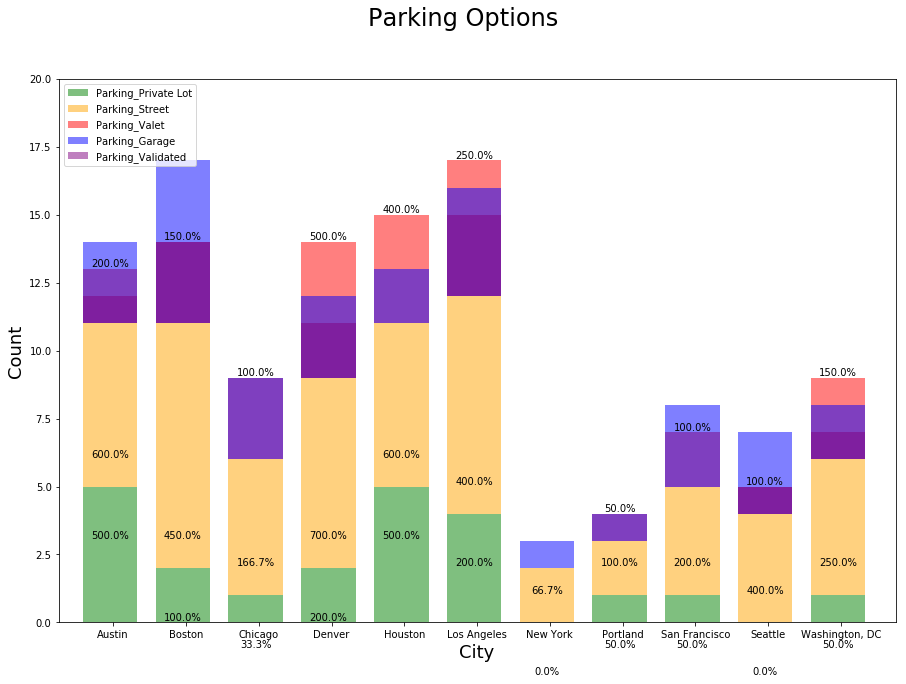

In [317]:
f, ax1 = plt.subplots(1, figsize=(15,10))
bar_width = 0.75
bar_l = [i+1 for i in range(len(bar_data_grp2['Parking_Private Lot']))] # positions of the left bar-boundaries
tick_pos = [i+(bar_width/18) for i in bar_l] # positions of the x-axis ticks (center of the bars as bar labels)

ax1.bar(bar_l, bar_data_grp2['Parking_Private Lot'],width=bar_width, label='Parking_Private Lot', alpha=0.5, color='green')

ax1.bar(bar_l, bar_data_grp2['Parking_Street'], width=bar_width, bottom=bar_data_grp2['Parking_Private Lot'], label='Parking_Street', alpha=0.5,color='orange')

ax1.bar(bar_l, bar_data_grp2['Parking_Valet'], width=bar_width, bottom=[i+j for i,j in zip(bar_data_grp2['Parking_Private Lot'],
              bar_data_grp2['Parking_Street'])],label='Parking_Valet',alpha=0.5,color='red')

ax1.bar(bar_l, bar_data_grp2['Parking_Garage'], width=bar_width, bottom=[i+j for i,j,k in zip(bar_data_grp2['Parking_Private Lot'],
              bar_data_grp2['Parking_Street'], bar_data_grp2['Parking_Valet'])],label='Parking_Garage',alpha=0.5,color='blue')

ax1.bar(bar_l, bar_data_grp2['Parking_Validated'], width=bar_width, bottom=[i+j for i,j,k,l in zip(bar_data_grp2['Parking_Private Lot'],
              bar_data_grp2['Parking_Street'], bar_data_grp2['Parking_Valet'], bar_data_grp2['Parking_Validated'])],label='Parking_Validated',alpha=0.5,color='purple')

for index, row in bar_data_grp2.iterrows():
    ax1.text(index+1, row['Parking_Private Lot']-2,'%s' % "{:.1%}".format(round(float(row['Parking_Private Lot']/row['total']),3)),ha='center', va='bottom')
    ax1.text(index+1, row['Parking_Private Lot']+1,'%s' % "{:.1%}".format(round(float(row['Parking_Street']/row['total']),3)),ha='center', va='bottom')
    if row['Parking_Valet'] != 0:
        ax1.text(index+1, row['Parking_Valet']+row['Parking_Street']+row['Parking_Private Lot'],'%s' % "{:.1%}".format(round(float(row['Parking_Valet']/row['total']),3)),ha='center', va='bottom')
  
plt.xticks(tick_pos, bar_data_grp2['City'])
plt.legend(loc='upper left')
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim([0, 20])
f.suptitle('Parking Options', fontsize=24)
plt.xlabel('City', fontsize=18)
plt.ylabel('Count', fontsize=18)

### Price_Level

In [182]:
def dollars_to_strings(argument):
    switcher = {
        '$': "Cheap",
        '$$': "Moderate",
        '$$$': "Pricey",
        '$$$$': "Pricey"}
    return switcher.get(argument, "nothing")

In [183]:
bar_data["Price_Level"] = bar_data["Price_Level"].astype(str)
bar_data["Price_Level"] = bar_data["Price_Level"].apply(dollars_to_strings)
bar_data["Price_Level"].unique()

array(['Moderate', 'Pricey', 'Cheap'], dtype=object)

In [186]:
bar_data_grp = pd.DataFrame(bar_data.groupby(['City','Price_Level']).size()).reset_index()
bar_data_grp2 = bar_data_grp.pivot('City','Price_Level').reset_index()
bar_data_grp2.columns = bar_data_grp2.columns.droplevel(0)
bar_data_grp2 = bar_data_grp2.rename_axis(None, axis=1)
# bar_data_grp2
bar_data_grp2.columns = ['City','Cheap','Moderate','Pricey']
bar_data_grp2['total'] = bar_data_grp2.fillna(0)['Cheap']+ \
    bar_data_grp2.fillna(0)['Moderate'] + bar_data_grp2.fillna(0)['Pricey']
bar_data_grp2 = bar_data_grp2.sort_values(['Cheap'], ascending=True)
bar_data_grp2 = bar_data_grp2.reset_index(drop=True).fillna(0)
bar_data_grp2

,City,Cheap,Moderate,Pricey,total
0,Boston,2,28,10,40
1,Chicago,3,35,2,40
2,Los Angeles,3,32,4,39
3,New York,3,22,9,34
4,Portland,3,35,1,39
5,Seattle,3,29,2,34
6,"Washington, DC",3,32,5,40
7,Houston,4,35,1,40
8,San Francisco,4,33,3,40
9,Denver,5,34,1,40


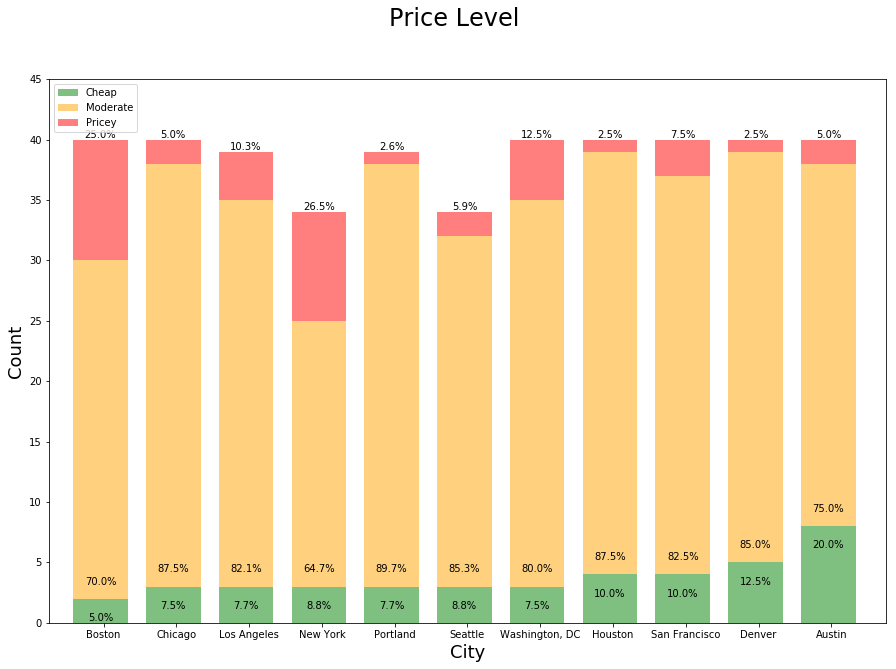

In [200]:
f, ax1 = plt.subplots(1, figsize=(15,10))
bar_width = 0.75
bar_l = [i+1 for i in range(len(bar_data_grp2['Cheap']))] # positions of the left bar-boundaries
tick_pos = [i+(bar_width/18) for i in bar_l] # positions of the x-axis ticks (center of the bars as bar labels)

ax1.bar(bar_l, bar_data_grp2['Cheap'],width=bar_width, label='Cheap', alpha=0.5, color='green')
ax1.bar(bar_l, bar_data_grp2['Moderate'], width=bar_width, bottom=bar_data_grp2['Cheap'], label='Moderate', alpha=0.5,color='orange')
ax1.bar(bar_l, bar_data_grp2['Pricey'], width=bar_width, bottom=[i+j for i,j in zip(bar_data_grp2['Cheap'],
              bar_data_grp2['Moderate'])],label='Pricey',alpha=0.5,color='red')

for index, row in bar_data_grp2.iterrows():
    ax1.text(index+1, row['Cheap']-2,'%s' % "{:.1%}".format(round(float(row['Cheap']/row['total']),3)),ha='center', va='bottom')
    ax1.text(index+1, row['Cheap']+1,'%s' % "{:.1%}".format(round(float(row['Moderate']/row['total']),3)),ha='center', va='bottom')
    if row['Pricey'] != 0:
        ax1.text(index+1, row['Pricey']+row['Moderate']+row['Cheap'],'%s' % "{:.1%}".format(round(float(row['Pricey']/row['total']),3)),ha='center', va='bottom')
  
plt.xticks(tick_pos, bar_data_grp2['City'])
plt.legend(loc='upper left')
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim([0, 45])
f.suptitle('Price Level', fontsize=24)
plt.xlabel('City', fontsize=18)
plt.ylabel('Count', fontsize=18)

### Smoking

In [132]:
bar_data["Smoking"] = bar_data["Smoking"].astype(str)
bar_data["Smoking"].unique()

array(['nan', 'No', 'Outdoor Area / Patio Only', 'Yes'], dtype=object)

In [145]:
bar_data_grp = pd.DataFrame(bar_data.groupby(['City','Smoking']).size()).reset_index()
bar_data_grp2 = bar_data_grp.pivot('City','Smoking').reset_index()
bar_data_grp2.columns = bar_data_grp2.columns.droplevel(0)
bar_data_grp2 = bar_data_grp2.rename_axis(None, axis=1)
bar_data_grp2.columns = ['City','No','Outdoor Area / Patio Only','Yes','nan']
bar_data_grp2['total'] = bar_data_grp2.fillna(0)['Yes']+bar_data_grp2.fillna(0)['No']+bar_data_grp2.fillna(0)['Outdoor Area / Patio Only']
bar_data_grp2 = bar_data_grp2.sort_values(['No'], ascending=True)
bar_data_grp2 = bar_data_grp2.reset_index(drop=True).fillna(0)

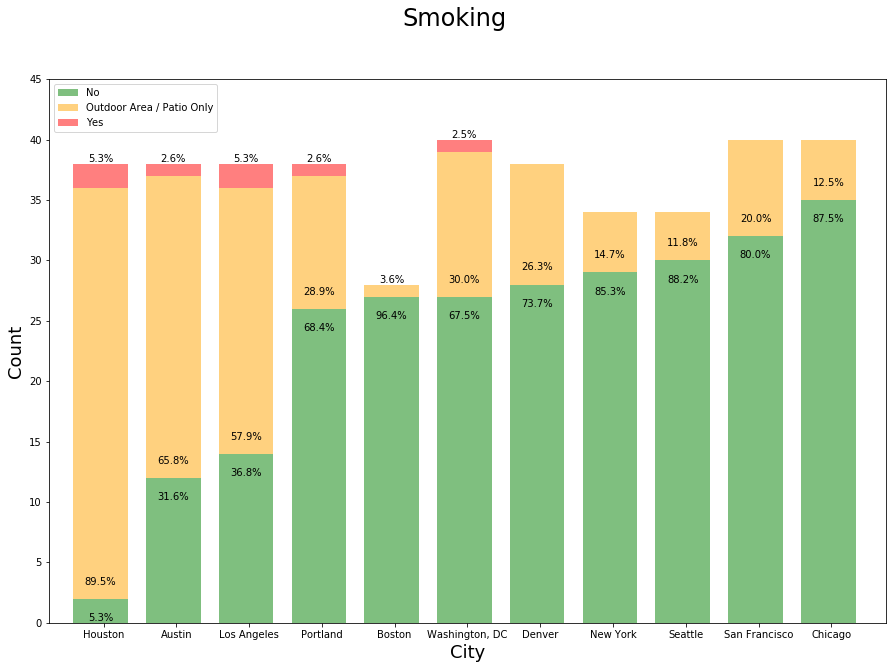

In [159]:
f, ax1 = plt.subplots(1, figsize=(15,10))
bar_width = 0.75
bar_l = [i+1 for i in range(len(bar_data_grp2['No']))] # positions of the left bar-boundaries
tick_pos = [i+(bar_width/18) for i in bar_l] # positions of the x-axis ticks (center of the bars as bar labels)

ax1.bar(bar_l, bar_data_grp2['No'],width=bar_width, label='No', alpha=0.5, color='green')
ax1.bar(bar_l, bar_data_grp2['Outdoor Area / Patio Only'], width=bar_width, bottom=bar_data_grp2['No'], label='Outdoor Area / Patio Only', alpha=0.5,color='orange')
ax1.bar(bar_l, bar_data_grp2['Yes'], width=bar_width, bottom=[i+j for i,j in zip(bar_data_grp2['No'],
              bar_data_grp2['Outdoor Area / Patio Only'])],label='Yes',alpha=0.5,color='red')

for index, row in bar_data_grp2.iterrows():
    ax1.text(index+1, row['No']-2,'%s' % "{:.1%}".format(round(float(row['No']/row['total']),3)),ha='center', va='bottom')
    ax1.text(index+1, row['No']+1,'%s' % "{:.1%}".format(round(float(row['Outdoor Area / Patio Only']/row['total']),3)),ha='center', va='bottom')
    if row['Yes'] != 0:
        ax1.text(index+1, row['Yes']+row['Outdoor Area / Patio Only']+row['No'],'%s' % "{:.1%}".format(round(float(row['Yes']/row['total']),3)),ha='center', va='bottom')
  
plt.xticks(tick_pos, bar_data_grp2['City'])
plt.legend(loc='upper left')
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim([0, 45])
f.suptitle('Smoking', fontsize=24)
plt.xlabel('City', fontsize=18)
plt.ylabel('Count', fontsize=18)

### Takes Reservations

In [121]:
bar_data["Takes Reservations"] = bar_data["Takes Reservations"].astype(str)
bar_data["Takes Reservations"].unique()

array(['No', 'Yes', 'nan'], dtype=object)

In [122]:
bar_data_grp = pd.DataFrame(bar_data.groupby(['City','Takes Reservations']).size()).reset_index()
bar_data_grp2 = bar_data_grp.pivot('City','Takes Reservations').reset_index()
bar_data_grp2.columns = bar_data_grp2.columns.droplevel(0)
bar_data_grp2 = bar_data_grp2.rename_axis(None, axis=1)
bar_data_grp2.columns = ['City','Yes','No','nan']
bar_data_grp2['total'] = bar_data_grp2.fillna(0)['Yes']+bar_data_grp2.fillna(0)['No']
bar_data_grp2 = bar_data_grp2.sort_values(['Yes'], ascending=True)
bar_data_grp2 = bar_data_grp2.reset_index(drop=True).fillna(0)

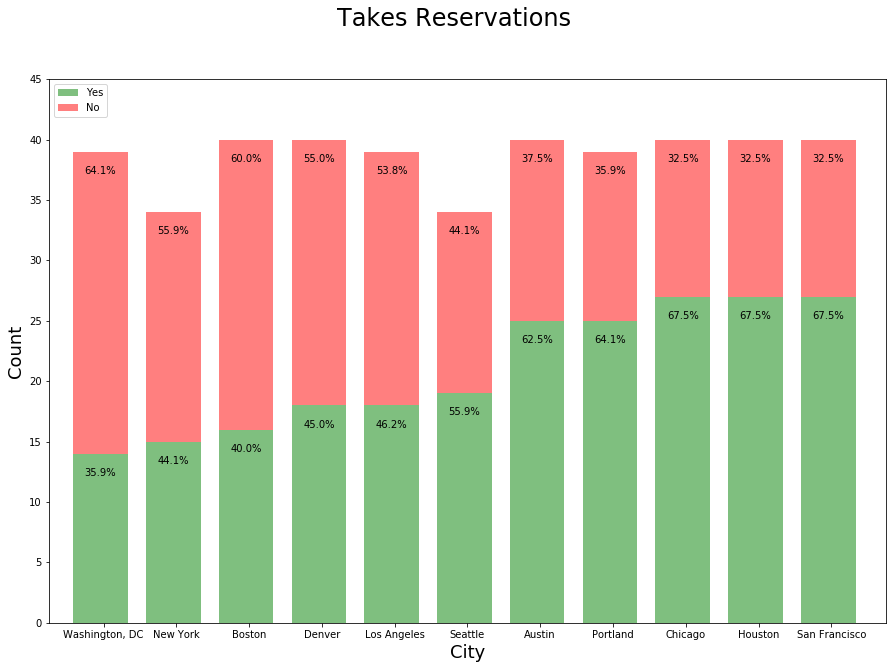

In [123]:
f, ax1 = plt.subplots(1, figsize=(15,10))
bar_width = 0.75
bar_l = [i+1 for i in range(len(bar_data_grp2['Yes']))] # positions of the left bar-boundaries
tick_pos = [i+(bar_width/18) for i in bar_l] # positions of the x-axis ticks (center of the bars as bar labels)

ax1.bar(bar_l, bar_data_grp2['Yes'],width=bar_width, label='Yes', alpha=0.5, color='green')
ax1.bar(bar_l, bar_data_grp2['No'], width=bar_width, bottom=bar_data_grp2['Yes'], label='No', alpha=0.5,color='red')

for index, row in bar_data_grp2.iterrows():
    ax1.text(index+1, row['Yes']-2,'%s' % "{:.1%}".format(round(float(row['Yes']/row['total']),3)),ha='center', va='bottom')
    ax1.text(index+1, row['Yes']+row['No']-2,'%s' % "{:.1%}".format(round(float(row['No']/row['total']),3)),ha='center', va='bottom')

plt.xticks(tick_pos, bar_data_grp2['City'])
plt.legend(loc='upper left')
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim([0, 45])
f.suptitle('Takes Reservations', fontsize=24)
plt.xlabel('City', fontsize=18)
plt.ylabel('Count', fontsize=18)

### Waiter Service

In [82]:
bar_data["Waiter_Service"] = bar_data["Waiter_Service"].astype(str)
bar_data["Waiter_Service"].unique()

array(['Yes', 'No', 'nan'], dtype=object)

In [114]:
bar_data_grp = pd.DataFrame(bar_data.groupby(['City','Waiter_Service']).size()).reset_index()
bar_data_grp2 = bar_data_grp.pivot('City','Waiter_Service').reset_index()
bar_data_grp2.columns = bar_data_grp2.columns.droplevel(0)
bar_data_grp2 = bar_data_grp2.rename_axis(None, axis=1)
bar_data_grp2.columns = ['City','Yes','No','nan']
bar_data_grp2['total'] = bar_data_grp2.fillna(0)['Yes']+bar_data_grp2.fillna(0)['No']
bar_data_grp2 = bar_data_grp2.sort_values(['Yes'], ascending=True)
bar_data_grp2 = bar_data_grp2.reset_index(drop=True).fillna(0)
# bar_data_grp2

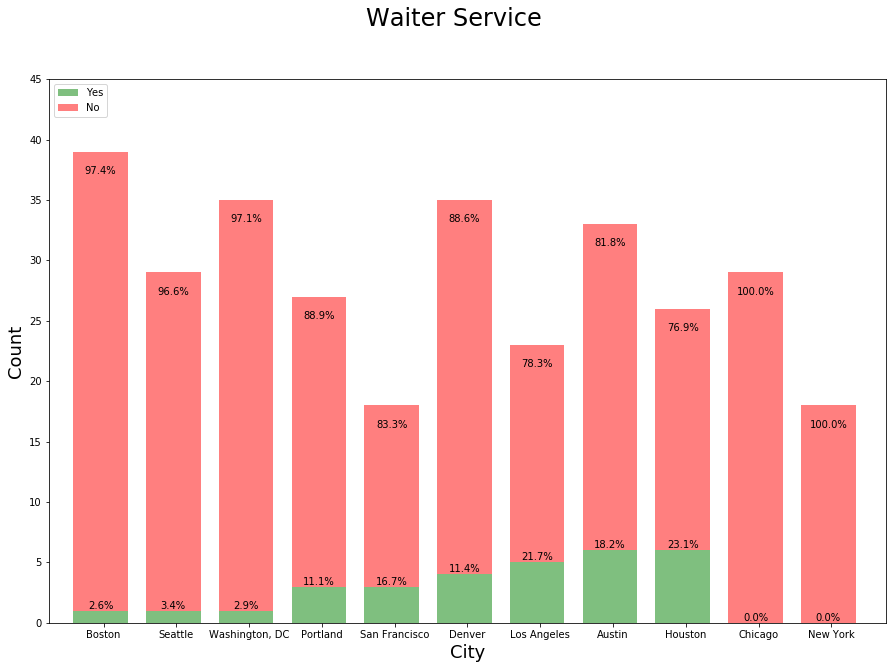

In [115]:
f, ax1 = plt.subplots(1, figsize=(15,10))
bar_width = 0.75
bar_l = [i+1 for i in range(len(bar_data_grp2['Yes']))] # positions of the left bar-boundaries
tick_pos = [i+(bar_width/18) for i in bar_l] # positions of the x-axis ticks (center of the bars as bar labels)

ax1.bar(bar_l, bar_data_grp2['Yes'],width=bar_width, label='Yes', alpha=0.5, color='green')
ax1.bar(bar_l, bar_data_grp2['No'], width=bar_width, bottom=bar_data_grp2['Yes'], label='No', alpha=0.5,color='red')

for index, row in bar_data_grp2.iterrows():
    ax1.text(index+1, row['Yes'],'%s' % "{:.1%}".format(round(float(row['Yes']/row['total']),3)),ha='center', va='bottom')
    ax1.text(index+1, row['Yes']+row['No']-2,'%s' % "{:.1%}".format(round(float(row['No']/row['total']),3)),ha='center', va='bottom')

plt.xticks(tick_pos, bar_data_grp2['City'])
plt.legend(loc='upper left')
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim([0, 45])
f.suptitle('Waiter Service', fontsize=24)
plt.xlabel('City', fontsize=18)
plt.ylabel('Count', fontsize=18)

### Wi-Fi

In [105]:
bar_data["Wi-Fi"] = bar_data["Wi-Fi"].astype(str)
bar_data["Wi-Fi"].unique()

array(['Free', 'No', 'Paid', 'nan'], dtype=object)

In [109]:
bar_data_grp = pd.DataFrame(bar_data.groupby(['City','Wi-Fi']).size()).reset_index()
bar_data_grp2 = bar_data_grp.pivot('City','Wi-Fi').reset_index()
bar_data_grp2.columns = bar_data_grp2.columns.droplevel(0)
bar_data_grp2 = bar_data_grp2.rename_axis(None, axis=1)
bar_data_grp2.columns = ['City','Free','No','Paid','nan']
bar_data_grp2['total'] = bar_data_grp2.fillna(0)['Free']+bar_data_grp2.fillna(0)['No']+bar_data_grp2.fillna(0)['Paid']
bar_data_grp2 = bar_data_grp2.sort_values(['Free'], ascending=True)
bar_data_grp2 = bar_data_grp2.reset_index(drop=True).fillna(0)

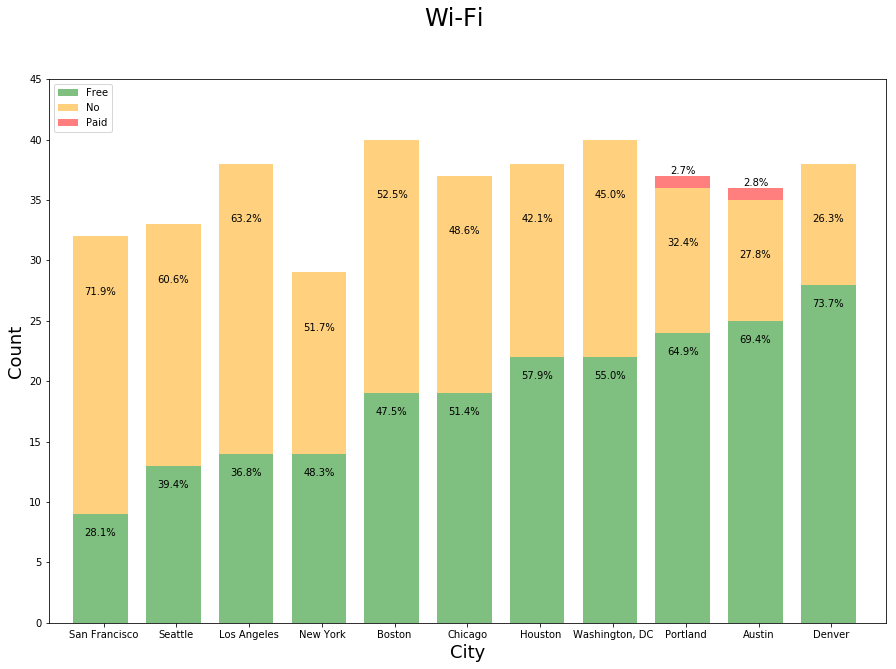

In [113]:
f, ax1 = plt.subplots(1, figsize=(15,10))
bar_width = 0.75
bar_l = [i+1 for i in range(len(bar_data_grp2['Free']))] # positions of the left bar-boundaries
tick_pos = [i+(bar_width/18) for i in bar_l] # positions of the x-axis ticks (center of the bars as bar labels)

ax1.bar(bar_l, bar_data_grp2['Free'],width=bar_width, label='Free', alpha=0.5, color='green')
ax1.bar(bar_l, bar_data_grp2['No'], width=bar_width, bottom=bar_data_grp2['Free'], label='No', alpha=0.5,color='orange')
ax1.bar(bar_l, bar_data_grp2['Paid'], width=bar_width, bottom=[i+j for i,j in zip(bar_data_grp2['Free'],
              bar_data_grp2['No'])],label='Paid',alpha=0.5,color='red')

for index, row in bar_data_grp2.iterrows():
    ax1.text(index+1, row['Free']-2,'%s' % "{:.1%}".format(round(float(row['Free']/row['total']),3)),ha='center', va='bottom')
    ax1.text(index+1, row['Free']+row['No']-5,'%s' % "{:.1%}".format(round(float(row['No']/row['total']),3)),ha='center', va='bottom')
    if row['Paid'] != 0:
        ax1.text(index+1, row['Free']+row['No']+row['Paid'],'%s' % "{:.1%}".format(round(float(row['Paid']/row['total']),3)),ha='center', va='bottom')

plt.xticks(tick_pos, bar_data_grp2['City'])
plt.legend(loc='upper left')
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim([0, 45])
f.suptitle('Wi-Fi', fontsize=24)
plt.xlabel('City', fontsize=18)
plt.ylabel('Count', fontsize=18)

### Export Dataset

In [110]:
bar_data.to_csv(dir+'yelp_data_bars_features.csv', index=False)